In [3]:
import tweepy,sys,jsonpickle
consumer_key = "2fCJfaHQPdkTznJ7wNBjQAc89"
consumer_secret ="ti78tQlesMGXOgfPv7AWtnkYYAIMTIqfMIklt2ZNxJ6H8v7hSz"

qry = 'Boundaries' #query yang akan di cari
maxTweets =  100# Isi sembarang nilai sesuai kebutuhan anda
tweetsPerQry = 50  # Jangan isi lebih dari 100, ndak boleh oleh Twitter
fName='Boundaries.json' # Nama File hasil Crawling

auth = tweepy.AppAuthHandler(consumer_key,consumer_secret)
api = tweepy.API(auth, cache=None,host='api.twitter.com')

if (not api):
    sys.exit('Autentikasi gagal, mohon cek "Consumer Key" & "Consumer Secret" Twitter anda')

sinceId, max_id, tweetCount = None, -1, 0

print("Mulai mengunduh maksimum {0} tweets".format(maxTweets))
with open(fName,'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets=api.search_tweets(q=qry,count=tweetsPerQry)
                else:
                    new_tweets=api.search_tweets(q=qry,count=tweetsPerQry,since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets=api.search_tweets(q=qry,count=tweetsPerQry,max_id=str(max_id - 1))
                else:
                    new_tweets=api.search_tweets(q=qry,count=tweetsPerQry,max_id=str(max_id - 1),since_id=sinceId)
            if not new_tweets:
                print('Tidak ada lagi Tweet ditemukan dengan Query="{0}"'.format(qry));break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            tweetCount+=len(new_tweets)
            sys.stdout.write("\r");sys.stdout.write("Jumlah Tweets telah tersimpan: %.0f" %tweetCount);sys.stdout.flush()
            max_id=new_tweets[-1].id
        except tweepy.errors.TweepyException as e:
            print("some error : " + str(e));break # Aya error, keluar
print ('\nSelesai! {0} tweets tersimpan di "{1}"'.format(tweetCount,fName))

Mulai mengunduh maksimum 100 tweets
Jumlah Tweets telah tersimpan: 100
Selesai! 100 tweets tersimpan di "Boundaries.json"


In [1]:
import tweepy
import json
import pandas as pd
import numpy as np

In [2]:
api_key = "2fCJfaHQPdkTznJ7wNBjQAc89"
api_secret_key = "ti78tQlesMGXOgfPv7AWtnkYYAIMTIqfMIklt2ZNxJ6H8v7hSz"
access_token = "1505507341340651520-lBNoDtvYgo1PuzK3bECbANVUgcfqbq"
access_token_secret = "fvv4DiCqQNq17PscPTPUZHAJJ3RW5xPecZZLr5Km0m0GT"

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token = (access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
search_result = api.search_tweets(q="Boundaries", count=100)

In [5]:
"""
for tweet in search_result:
    tweet_properties = {}
    tweet_properties["date"] = tweet.created_at
    tweet_properties["user"] = tweet.user.screen_name
    tweet_properties["sentence"] = tweet.text
    print(tweet_properties)
"""

'\nfor tweet in search_result:\n    tweet_properties = {}\n    tweet_properties["date"] = tweet.created_at\n    tweet_properties["user"] = tweet.user.screen_name\n    tweet_properties["sentence"] = tweet.text\n    print(tweet_properties)\n'

In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in search_result], columns=['Tweets'])
data

,Tweets
0,RT @Beamish___: @Oneirataxia_1 Never apologise...
1,RT @OnDaBall5: This is you're Captain Billy sp...
2,RT @mrcreepyposta: AKHIR KATA\n-Jangan duduk s...
3,Never share more than what you are comfortable...
4,RT @Eziahatoka: Boundaries stop nonsense
...,...
95,Virat Kohli finds form as RCB steamroll Gujara...
96,RT @UrsVamsiShekar: He came.. He saw.. He conq...
97,RT @michtom20: @NancyHamOnt Reporters are on r...
98,"It took me too long to learn boundaries. But, ..."


In [7]:
print(dir(search_result[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(search_result[0].id)
print(search_result[0].created_at)
print(search_result[0].source)
print(search_result[0].favorite_count)
print(search_result[0].retweet_count)
print(search_result[0].geo)
print(search_result[0].coordinates)
print(search_result[0].entities)

1527456786860519424
2022-05-20 01:10:51+00:00
Twitter for Android
0
1
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Beamish___', 'name': '🌻', 'id': 1006900334373920769, 'id_str': '1006900334373920769', 'indices': [3, 14]}, {'screen_name': 'Oneirataxia_1', 'name': 'Mabby', 'id': 1334619223079915520, 'id_str': '1334619223079915520', 'indices': [16, 30]}], 'urls': []}


In [9]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in search_result])
data['ID']   = np.array([tweet.id for tweet in search_result])
data['Date'] = np.array([tweet.created_at for tweet in search_result])
data['Source'] = np.array([tweet.source for tweet in search_result])
data['Likes']  = np.array([tweet.favorite_count for tweet in search_result])
data['RTs']    = np.array([tweet.retweet_count for tweet in search_result])

In [10]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @Beamish___: @Oneirataxia_1 Never apologise...,140,1527456786860519424,2022-05-20 01:10:51+00:00,Twitter for Android,0,1
1,RT @OnDaBall5: This is you're Captain Billy sp...,132,1527456755503857669,2022-05-20 01:10:43+00:00,Twitter for iPhone,0,2
2,RT @mrcreepyposta: AKHIR KATA\n-Jangan duduk s...,140,1527456742275043328,2022-05-20 01:10:40+00:00,Twitter for iPhone,0,72
3,Never share more than what you are comfortable...,124,1527456687321501708,2022-05-20 01:10:27+00:00,Twitter for iPhone,0,0
4,RT @Eziahatoka: Boundaries stop nonsense,40,1527456672859541513,2022-05-20 01:10:24+00:00,Twitter for Android,0,87
5,RT @SayItValencia: Speak up when you don’t lik...,140,1527456637467906048,2022-05-20 01:10:15+00:00,Twitter for iPhone,0,458
6,RT @sunlithetarot: 💌🌸 • mini love message\n— t...,140,1527456605947809800,2022-05-20 01:10:08+00:00,Twitter Web App,0,141
7,Drawing boundaries is self care.,32,1527456602856402944,2022-05-20 01:10:07+00:00,Twitter for iPhone,0,0
8,RT @sparklesugglets: 💫incoming messages for th...,144,1527456597102022662,2022-05-20 01:10:06+00:00,Twitter for Android,0,172
9,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527456564725964800,2022-05-20 01:09:58+00:00,Twitter for Android,0,1029


In [14]:
data.sort_values(by='RTs', ascending=False)[:5]

,Tweets,len,ID,Date,Source,Likes,RTs
99,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527454552567402496,2022-05-20 01:01:58+00:00,Twitter for Android,0,1029
85,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527454778384478208,2022-05-20 01:02:52+00:00,Twitter Web App,0,1029
42,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527456067013455878,2022-05-20 01:07:59+00:00,Twitter for iPhone,0,1029
47,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527455837824118784,2022-05-20 01:07:05+00:00,Twitter for Android,0,1029
32,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527456316557385728,2022-05-20 01:08:59+00:00,Twitter for Android,0,1029


In [15]:
data.sort_values(by='Date', ascending=True)[:5]

,Tweets,len,ID,Date,Source,Likes,RTs
99,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527454552567402496,2022-05-20 01:01:58+00:00,Twitter for Android,0,1029
98,"It took me too long to learn boundaries. But, ...",140,1527454553221783552,2022-05-20 01:01:58+00:00,Twitter Web App,0,0
97,RT @michtom20: @NancyHamOnt Reporters are on r...,140,1527454556531183626,2022-05-20 01:01:59+00:00,Twitter Web App,0,4
96,RT @UrsVamsiShekar: He came.. He saw.. He conq...,140,1527454561606066176,2022-05-20 01:02:00+00:00,Twitter for Android,0,1029
95,Virat Kohli finds form as RCB steamroll Gujara...,140,1527454572276600849,2022-05-20 01:02:03+00:00,MarketsCafe,0,0


In [32]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 125.46


In [33]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
THREAD Palestinian refugee camps in Lebanon have expanded only a small distance from their original boundaries, des… https://t.co/NQtRkAPNPS
Number of likes: 6
140 characters.

The tweet with more retweets is: 
RT @SadhguruJV: Time to rise beyond social &amp; national boundaries to build a temple of Humanity for the Soil that has held us in indiscrimin…
Number of retweets: 5800
144 characters.



<h1>TIME SERIES</h1>

In [35]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

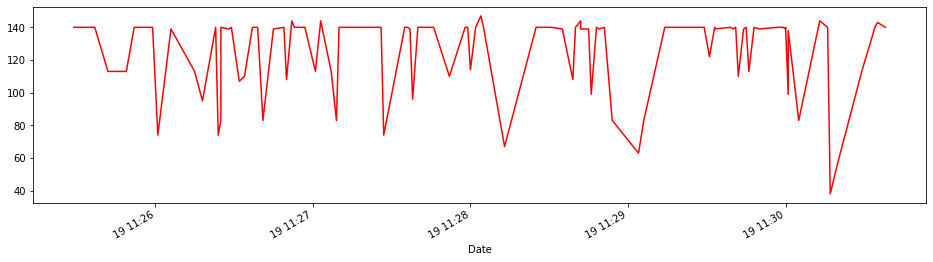

In [41]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

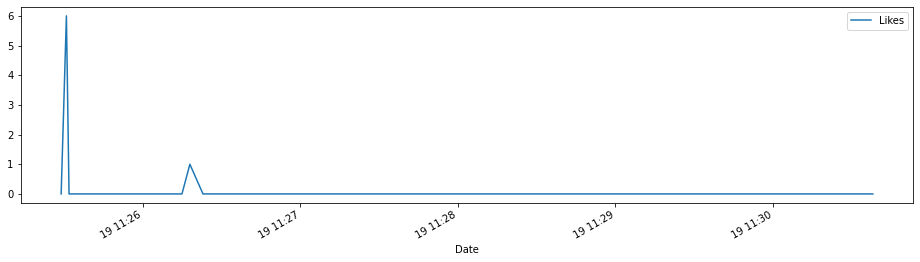

In [44]:
# Likes visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True);

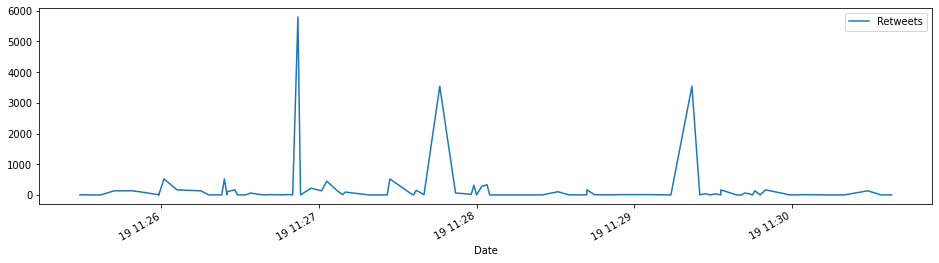

In [45]:
# Retweets visualization:
tret.plot(figsize=(16,4), label="Retweets", legend=True);

<h1>Pie Chart</h1>

In [46]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web App
* Twitter for iPhone
* PromoRepublic
* TweetDeck
* Twitter for iPad


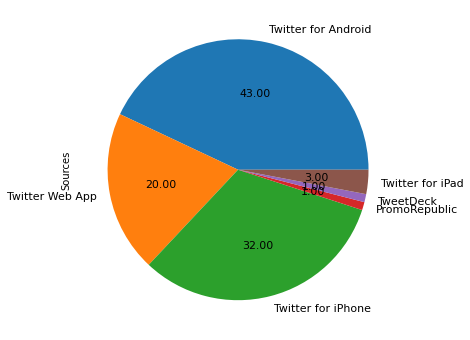

In [47]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [49]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [50]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@410MLXVI The celebration of sodomy and sexual...,140,1527250371323777025,2022-05-19 11:30:38+00:00,Twitter for Android,0,0,1
1,@firslordzuko i literally said the same thing ...,143,1527250358346579969,2022-05-19 11:30:35+00:00,Twitter Web App,0,0,0
2,RT @MasterMetaNFT: Big shout out to @KaijuKing...,140,1527250354911465478,2022-05-19 11:30:34+00:00,Twitter Web App,0,1,1
3,RT @feyiszn: I def believe in pushing the boun...,113,1527250334191693825,2022-05-19 11:30:29+00:00,Twitter for iPhone,0,134,1
4,"@nightlyht Goodness, people need to understand...",58,1527250297394978816,2022-05-19 11:30:20+00:00,Twitter for Android,0,0,0
5,@in_northeast Nature has no boundaries,38,1527250286791626752,2022-05-19 11:30:17+00:00,Twitter for iPhone,0,0,0
6,"NEW YORK TIMES BESTSELLER 🗽\n\nSet Boundaries,...",140,1527250278684053504,2022-05-19 11:30:16+00:00,Twitter for iPhone,0,0,1
7,Conversation about BOUNDARIES &amp; BALANCE: L...,144,1527250267577647104,2022-05-19 11:30:13+00:00,Twitter for Android,0,0,0
8,RT @oku_yungx: The real flex is keeping your h...,83,1527250233658327040,2022-05-19 11:30:05+00:00,Twitter for iPhone,0,10,1
9,Co-dependency is relationship addiction...\n.\...,138,1527250218785325057,2022-05-19 11:30:01+00:00,PromoRepublic,0,0,1


In [51]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [52]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 55.0%
Percentage of neutral tweets: 32.0%
Percentage de negative tweets: 13.0%


In [59]:
list_tweet = list(data.Tweets)
list_tweet

["@410MLXVI The celebration of sodomy and sexual depravity holds no boundaries.\n\nPandora's box is well and truly open. https://t.co/l6VqRsA2sl",
 '@firslordzuko i literally said the same thing yesterday abt how ppl should have boundaries &amp; that weirdo literally… https://t.co/3zUhjV9wwh',
 'RT @MasterMetaNFT: Big shout out to @KaijuKingz for a completely unique and engaging mint process on the way to owning a scientist!  \n\nStuf…',
 'RT @feyiszn: I def believe in pushing the boundaries with your parents. They need to learn your life is your own.',
 '@nightlyht Goodness, people need to understand boundaries.',
 '@in_northeast Nature has no boundaries',
 'NEW YORK TIMES BESTSELLER 🗽\n\nSet Boundaries, buku self-improvement terbaru yang sebentar lagi akan segera terbit. D… https://t.co/6I7e4J2dji',
 'Conversation about BOUNDARIES &amp; BALANCE: LIVING A LIFE OF FREEDOM\nMay 22, 2022 02:00 PM\n\nPacific Time (US and Canad… https://t.co/x6IYyKYAci',
 'RT @oku_yungx: The real flex is k

In [35]:
from twitter import *

consumer_key = "iX87BIXursNzYgJe0h8s9CZa9"
consumer_secret = "Ec4E1L0CgQfXwErfdwg3L2fdOcWakzFdeX3ZczyjcB17XiNfVP"
access_token = "1157581058587541504-fvGd5DsJDg4hMAG0H3SbHYDFosEZOv"
access_token_secret = "2dZO82sNeuxfcWYkbNzBNW3XqSmtrodnVrNmmqeNzBeYq"

t = Twitter(
    auth=OAuth(access_token, access_token_secret, consumer_key, consumer_secret))

# Get your "home" timeline
t.statuses.home_timeline()

# Get a particular friend's timeline
t.statuses.user_timeline(screen_name="boogheta")

# to pass in GET/POST parameters, such as `count`
t.statuses.home_timeline(count=5)

# to pass in the GET/POST parameter `id` you need to use `_id`
t.statuses.show(_id=1234567890)

# Update your status
t.statuses.update(
    status="Using @boogheta's sweet Python Twitter Tools.")

# Send a direct message
t.direct_messages.events.new(
    _json={
        "event": {
            "type": "message_create",
            "message_create": {
                "target": {
                    "recipient_id": t.users.show(screen_name="boogheta")["id"]},
                "message_data": {
                    "text": "I think yer swell!"}}}})

# Get the members of maxmunnecke's list "network analysis tools" (grab the list_id within the url) https://twitter.com/i/lists/1130857490764091392
t.lists.members(owner_screen_name="maxmunnecke", list_id="1130857490764091392")

# Favorite/like a status
status = t.statuses.home_timeline()[0]
if not status['favorited']:
    t.favorites.create(_id=status['id'])

# An *optional* `_timeout` parameter can also be used for API
# calls which take much more time than normal or twitter stops
# responding for some reason:
t.users.lookup(
    screen_name=','.join(A_LIST_OF_100_SCREEN_NAMES), _timeout=1)

# Overriding Method: GET/POST
# you should not need to use this method as this library properly
# detects whether GET or POST should be used, Nevertheless
# to force a particular method, use `_method`
t.statuses.oembed(_id=1234567890, _method='GET')

# Send images along with your tweets:
# - first just read images from the web or from files the regular way:
with open("example.png", "rb") as imagefile:
    imagedata = imagefile.read()
# - then upload medias one by one on Twitter's dedicated server
#   and collect each one's id:
t_upload = Twitter(domain='upload.twitter.com',
    auth=OAuth(token, token_secret, consumer_key, consumer_secret))
id_img1 = t_upload.media.upload(media=imagedata)["media_id_string"]
id_img2 = t_upload.media.upload(media=imagedata)["media_id_string"]
# - finally send your tweet with the list of media ids:
t.statuses.update(status="PTT ★", media_ids=",".join([id_img1, id_img2]))

# Or send a tweet with an image (or set a logo/banner similarly)
# using the old deprecated method that will probably disappear some day
params = {"media[]": imagedata, "status": "PTT ★"}
# Or for an image encoded as base64:
params = {"media[]": base64_image, "status": "PTT ★", "_base64": True}
t.statuses.update_with_media(**params)

# Attach text metadata to medias sent, using the upload.twitter.com route
# using the _json workaround to send json arguments as POST body
# (warning: to be done before attaching the media to a tweet)
t_upload.media.metadata.create(_json={
  "media_id": id_img1,
  "alt_text": { "text": "metadata generated via PTT!" }
})
# or with the shortcut arguments ("alt_text" and "text" work):
t_upload.media.metadata.create(media_id=id_img1, text="metadata generated via PTT!")

# Search for the latest tweets about #pycon
t.search.tweets(q="deep Learning")

TwitterHTTPError: Twitter sent status 403 for URL: 1.1/statuses/home_timeline.json using parameters: (oauth_consumer_key=iX87BIXursNzYgJe0h8s9CZa9&oauth_nonce=16598668665373771829&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1638852281&oauth_token=1157581058587541504-fvGd5DsJDg4hMAG0H3SbHYDFosEZOv&oauth_version=1.0&oauth_signature=%2F4hV%2FMcw9Lpn%2BFH4ekpcJGU9Wk4%3D)
details: {'errors': [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]}

In [36]:
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAG52WgEAAAAAk9bP8yOA3rZoa7qRygoa34V9GZw%3DsfmzyX2sMFqfc1QJsCJopyh5zLz2eZx6AJupv3L6pmUwQmcZrx"
twitter = Twitter(auth=OAuth2(bearer_token=BEARER_TOKEN))

# Now work with Twitter
twitter.search.tweets(q='deep Learning"')

TwitterHTTPError: Twitter sent status 403 for URL: 1.1/search/tweets.json using parameters: (q=deep+Learning%22)
details: {'errors': [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]}